In [13]:
import warnings
warnings.filterwarnings("ignore")

import os
import yaml

import torch
import numpy as np
from PIL import Image
from utils.Siamese import SiameseNetwork
from utils.load_transformations import load_transformations
from utils.imshow import imshow
from utils.Grad_CAM import convert_to_tensor, Gram_CAM_heatmap
# Get configuration
with open("config.yml", 'r') as stream:
    params = yaml.safe_load(stream)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


### Siamese neural network model

In [14]:
# Load model
model = torch.load(os.path.join(params['checkpoints_path'], "model.pth"));
model.eval();
# Load transformation
_, tfms = load_transformations(params)

### Load data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


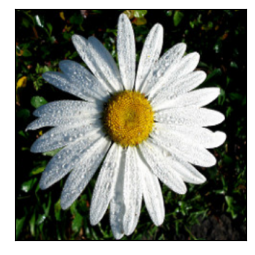

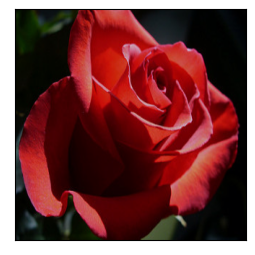

In [41]:
# Load images
# A = Image.open('./Data/Flowers/Rose/9167147034_0a66ee3616_n.jpg')
# A = Image.open('./Data/Skin_cancer/Benign/1091 Target 0.jpg')
A = Image.open('./Data/Flowers/Daisy/134409839_71069a95d1_m.jpg')
image1 = convert_to_tensor(A, tfms, device).unsqueeze(0)
imshow(image=image1, 
       mean=params['image']['normalization']['mean'],
       std=params['image']['normalization']['std'],
       figsize=(3,3),
       figname='Image1.png')


# B = Image.open('./Data/Flowers/Rose/4612830331_2a44957465_n.jpg')
# B = Image.open('./Data/Skin_cancer/Malignant/1237 Target 1.jpg')
B = Image.open('./Data/Flowers/Rose/394990940_7af082cf8d_n.jpg')
image2 = convert_to_tensor(B, tfms, device).unsqueeze(0)
imshow(image=image2, 
       mean=params['image']['normalization']['mean'],
       std=params['image']['normalization']['std'],
       figsize=(3,3),
       figname='Image2.png')

## Factual explanations

In [42]:
# Calculate model's prediction
pred = model(image1, image2)
print(f'Disimilarity: {100*pred.item():.1f}%')
# Backpropagation
pred.backward()

Disimilarity: 95.1%


In [43]:
# params['image']['size'] = (400, 600)

### Image 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


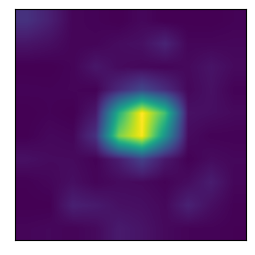

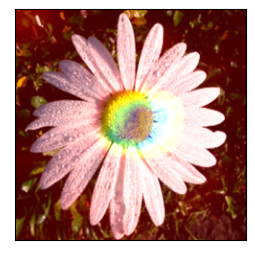

In [44]:
heatmap = Gram_CAM_heatmap(image1, model, 1, params['image']['size'], 'Factual_heatmap1.png');

imshow(image=image1, 
       heatmap=heatmap,
       scale=0.5,
       mean=params['image']['normalization']['mean'],
       std=params['image']['normalization']['std'],
       figsize=(3,3),
       figname='Factual_Image1_Grad-CAM.png')

### Image 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


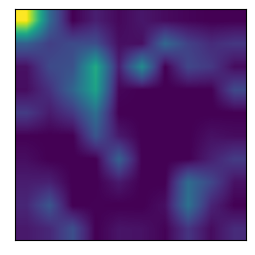

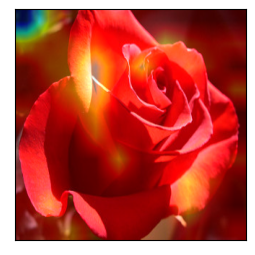

In [45]:
heatmap = Gram_CAM_heatmap(image2, model, 2, params['image']['size'], 'Factual_heatmap2.png')

imshow(image=image2, 
       heatmap=heatmap,
       scale=0.5,
       mean=params['image']['normalization']['mean'],
       std=params['image']['normalization']['std'],
       figsize=(3,3),
       figname='Factual_Image2_Grad-CAM.png')

### Counterfactual explanations

In [46]:
# Calculate model's (inverse) prediction
pred = 1 - model(image1, image2)
# Backpropagation
pred.backward()

### Image 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


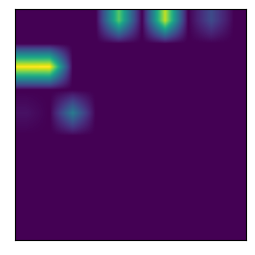

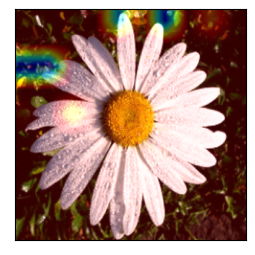

In [47]:
heatmap = Gram_CAM_heatmap(image1, model, 1, params['image']['size'], 'Counterfactual_heatmap1.png');

imshow(image=image1, 
       heatmap=heatmap,
       scale=0.4,
       mean=params['image']['normalization']['mean'],
       std=params['image']['normalization']['std'],
       figsize=(3,3),
       figname='Counterfactual_Image1_Grad-CAM.png')

### Image 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


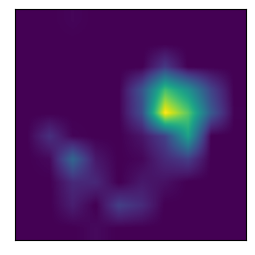

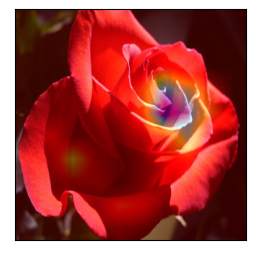

In [48]:
heatmap = Gram_CAM_heatmap(image2, model, 2, params['image']['size'], 'Counterfactual_heatmap2.png')

imshow(image=image2, 
       heatmap=heatmap,
       scale=0.4,
       mean=params['image']['normalization']['mean'],
       std=params['image']['normalization']['std'],
       figsize=(3,3),
       figname='Counterfactual_Image2_Grad-CAM.png')